Importing libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

**Linear Regression**

In [91]:
train_dataset = pd.read_csv('Regression_train.csv')
test_dataset = pd.read_csv('Regression_test.csv')

X_train = train_dataset[['X']]
y_train = train_dataset[['y']]

X_test = test_dataset[['X']]
y_test = test_dataset[['y']]

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [93]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

Training MSE: 12242.353775841922
Testing MSE: 43175.97559373732


In [94]:
X = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y = pd.concat([y_train, y_test], axis=0, ignore_index=True)

Training vs. Testing MSE Bar Plot

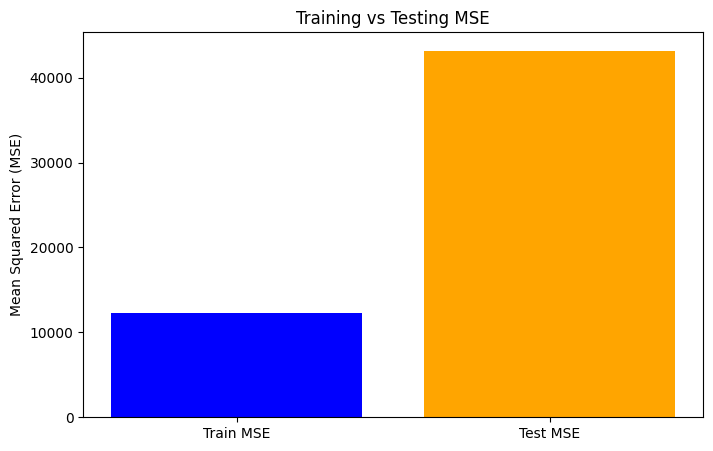

In [95]:
plt.figure(figsize=(8, 5))
plt.bar(['Train MSE', 'Test MSE'], [train_mse, test_mse], color=['blue', 'orange'])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs Testing MSE")
plt.show()

**Polynomial Regression**

In [96]:
data = pd.read_csv('ice_cream_selling_data.csv')

X = data[['Temperature (°C)']]
y = data[['Ice Cream Sales (units)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
def train_polynomial_regression(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    return model

In [98]:
degrees = [2, 3, 4, 5]

results = []

for degree in degrees:
    polynomial_model = train_polynomial_regression(degree)

    y_train_pred = polynomial_model.predict(X_train)
    y_test_pred = polynomial_model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    results.append((degree, train_mse, test_mse))

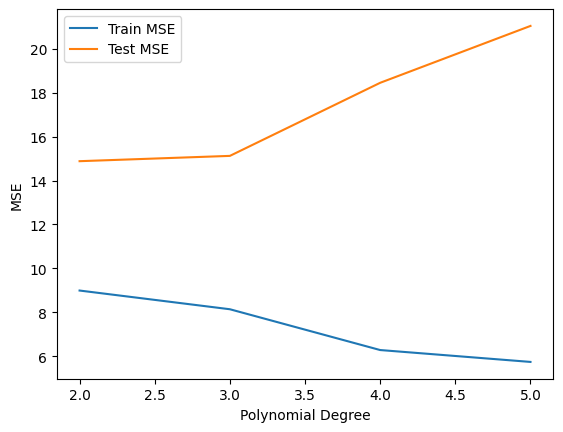

In [99]:
degrees, train_mses, test_mses = zip(*results)
plt.plot(degrees, train_mses, label='Train MSE')
plt.plot(degrees, test_mses, label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()

**Ridge & Lasso Regularization**

In [100]:
ridge_model = Ridge(alpha=10.0)
lasso_model = Lasso(alpha=0.5)

poly_features = PolynomialFeatures(degree=5)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

ridge_model.fit(X_train_poly, y_train)
lasso_model.fit(X_train_poly, y_train)

Lasso(alpha=0.5)

In [101]:
# Ridge
y_train_pred_ridge = ridge_model.predict(X_train_poly)
y_test_pred_ridge = ridge_model.predict(X_test_poly)

ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)


# Lasso
y_train_pred_lasso = lasso_model.predict(X_train_poly)
y_test_pred_lasso = lasso_model.predict(X_test_poly)

lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)


print(f"Ridge - Train MSE: {ridge_train_mse}, Test MSE: {ridge_test_mse}")
print(f"Lasso - Train MSE: {lasso_train_mse}, Test MSE: {lasso_test_mse}")

Ridge - Train MSE: 6.259697195418349, Test MSE: 17.665191517783803
Lasso - Train MSE: 6.6882113640108445, Test MSE: 17.355048542595746


Hyperparameter tuning usign Grid Search

In [102]:
ridge_alpha_values = {'alpha': np.logspace(0, 2, 25)}
lasso_alpha_values = {'alpha': np.logspace(-2, 0, 25)}

ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, param_grid=ridge_alpha_values, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

lasso = Lasso(max_iter=10000)
lasso_grid_search = GridSearchCV(lasso, param_grid=lasso_alpha_values, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

best_alpha_ridge = ridge_grid_search.best_params_['alpha']

best_alpha_lasso = lasso_grid_search.best_params_['alpha']

print(f"Best alpha for Ridge: {best_alpha_ridge}")
print(f"Best alpha for Lasso: {best_alpha_lasso}")

Best alpha for Ridge: 100.0
Best alpha for Lasso: 0.6812920690579611


In [103]:
ridge_model = Ridge(alpha=100.0)
lasso_model = Lasso(alpha=0.68)

poly_features = PolynomialFeatures(degree=5)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

ridge_model.fit(X_train_poly, y_train)
lasso_model.fit(X_train_poly, y_train)


# Ridge
y_train_pred_ridge = ridge_model.predict(X_train_poly)
y_test_pred_ridge = ridge_model.predict(X_test_poly)

ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)


# Lasso
y_train_pred_lasso = lasso_model.predict(X_train_poly)
y_test_pred_lasso = lasso_model.predict(X_test_poly)

lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)


print(f"Ridge - Train MSE: {ridge_train_mse}, Test MSE: {ridge_test_mse}")
print(f"Lasso - Train MSE: {lasso_train_mse}, Test MSE: {lasso_test_mse}")

Ridge - Train MSE: 11.31739209058042, Test MSE: 14.69259398284402
Lasso - Train MSE: 6.973221592456136, Test MSE: 17.11359606192071
